# Henry's constant calculations

In this notebook we'll calculate the Henry's constant. First, make sure the data is imported by running the import notebook.

In [1]:
%run import.ipynb

Selected 0 samples
Selected 23 adsorbates
Selected 5 isotherms with nitrogen at 77K
Selected 2 room temperature calorimetry isotherms
Selected 2 isotherms for IAST calculation
Selected 3 isotherms for isosteric heat calculation


Virial coefficients: [ -0.01580198   0.42144054  -3.57746521  12.20636609]
Residuals: [ 1.93734396]
Rank: 4
Singular values: [ 1.91154367  0.57389451  0.12721238  0.02151546]
Conditioning threshold: 9.10382880193e-15


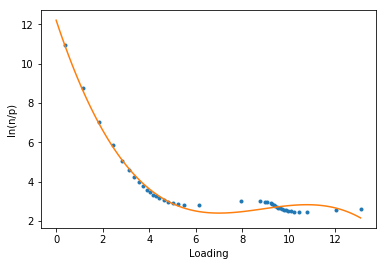

Virial coefficients: [  0.02962674  -0.55215384   1.37328352  14.04620667]
Residuals: [ 47.41658363]
Rank: 4
Singular values: [ 1.93908621  0.47289447  0.12667032  0.01643472]
Conditioning threshold: 1.487698853e-14


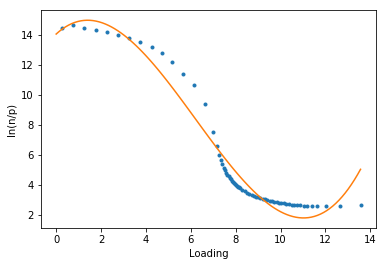

Virial coefficients: [-0.00868559  0.23443313 -1.72703121  5.52144003]
Residuals: [ 5.20328041]
Rank: 4
Singular values: [ 1.77031886  0.89718041  0.24455469  0.03509219]
Conditioning threshold: 5.99520433298e-15


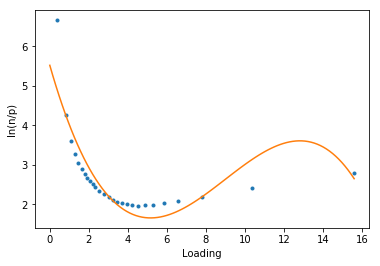

Virial coefficients: [  2.25670011e-03  -4.31507939e-02  -6.64206728e-01   1.52758344e+01]
Residuals: [ 1.58935804]
Rank: 4
Singular values: [ 1.94060759  0.46559767  0.1300763   0.0184705 ]
Conditioning threshold: 2.13162820728e-14


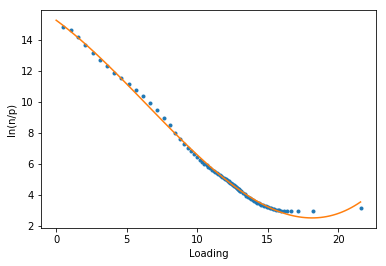

Virial coefficients: [ -8.97089164e-03   1.27573435e-01  -7.76649560e-01   1.41271317e+01]
Residuals: [ 21.9633104]
Rank: 4
Singular values: [ 1.96767055  0.35127069  0.0693576   0.00842801]
Conditioning threshold: 1.99840144433e-14


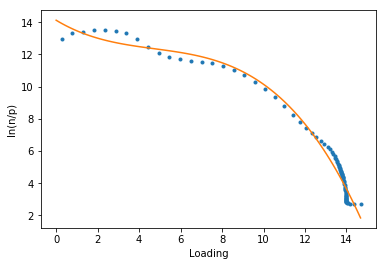

In [2]:
# Regular method
for isotherm in isotherms_n2_77k:
    pygaps.calc_initial_henry(isotherm, max_adjrms=0.01, verbose=True)


# Virial method
for isotherm in isotherms_n2_77k:
    pygaps.calc_initial_henry_virial(isotherm, verbose=True)